<a href="https://colab.research.google.com/github/ramya1807/Hospital-Playlist/blob/main/model_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing data
Which preprocessing data worked well

In [199]:
import pandas as pd

data = pd.read_csv('Results of Modelling (for evaluation) - Sheet1-3.csv')

#edit dataframe
#keep model used, preprocessing steps, accuracy, f1 score

#remove unnecessary data columns
#regression
data = data.drop(columns=['Model specifics (if any)', 'Predictor variables used', 'F1 score \n(average)', 'AIC', 'Accuracy', 'Remarks (if any)'])

#classification
#data = data.drop(columns=['Model specifics (if any)', 'Predictor variables used', 'R2 score \n(test set)', 'AIC', 'MSE', 'Remarks (if any)', 'AUC of ROC curve'])

data = data[data['Model type \n(Classification/Regression)'].str.contains('Regression')] #regression or classification
data = data[data['Genre as predictor'].str.contains('Y')] #regression or classification
data = data[data['Target: what we predict'].str.contains('total_health')] #which target
data

,standardScaler(),PCA,MinMaxScaler(),FunctionTransformer,Model type \n(Classification/Regression),Model used,Target: what we predict,Genre as predictor,AUC of ROC curve,R2 score \n(test set),MSE
109,0,0,1,0,Regression,Regression Tree,total_health,Y,NaN,-1.052375,55.519578
110,0,0,1,0,Regression,Support Vector Machine (SVR),total_health,Y,NaN,0.030252,26.233018
144,1,0,0,0,Regression,Regression Tree,total_health,Y,NaN,-1.049034,55.429217
145,1,0,0,0,Regression,Support Vector Machine (SVR),total_health,Y,NaN,0.032759,26.165215
179,0,1,0,0,Regression,Regression Tree,total_health,Y,NaN,-0.755806,47.496988
180,0,1,0,0,Regression,Support Vector Machine (SVR),total_health,Y,NaN,0.007031,26.861198
344,1,0,0,0,Regression,Ridge Regression,total_health,Y,NaN,39.855568,NaN
345,0,1,0,0,Regression,Ridge Regression,total_health,Y,NaN,28.890912,NaN
346,0,0,1,0,Regression,Ridge Regression,total_health,Y,NaN,28.872433,NaN
347,0,0,0,1,Regression,Ridge Regression,total_health,Y,NaN,28.890912,NaN


In [200]:
data = data[data['Model used'].str.contains('Tree')] #which model used
#data = data[data['Accuracy'] > 0] #remove invalid values
data = data[data['MSE'] > 0] #remove invalid values
data

,standardScaler(),PCA,MinMaxScaler(),FunctionTransformer,Model type \n(Classification/Regression),Model used,Target: what we predict,Genre as predictor,AUC of ROC curve,R2 score \n(test set),MSE
109,0,0,1,0,Regression,Regression Tree,total_health,Y,NaN,-1.052375,55.519578
144,1,0,0,0,Regression,Regression Tree,total_health,Y,NaN,-1.049034,55.429217
179,0,1,0,0,Regression,Regression Tree,total_health,Y,NaN,-0.755806,47.496988


In [4]:
def label_preprocessing (row):
   if row['standardScaler()'] == 1 :
      return 'standardScaler'
   if row['PCA'] == 1 :
      return 'PCA'
   if row['MinMaxScaler()'] == 1 :
      return 'MinMaxScaler'
   if row['FunctionTransformer'] == 1 :
      return 'FunctionTransformer'
   return 'Other'

In [110]:
data['Preprocessing'] = data.apply (lambda row: label_preprocessing(row), axis=1) #fix preprocessing features
data

,standardScaler(),PCA,MinMaxScaler(),FunctionTransformer,Model type \n(Classification/Regression),Model used,Target: what we predict,Accuracy,F1 score \n(average),Preprocessing
26,0,0,1,0,Classification,Logistic regression,self_actualization,0.25,0.08,MinMaxScaler
62,1,0,0,0,Classification,Logistic regression,self_actualization,0.28,0.11,standardScaler
97,0,1,0,0,Classification,Logistic regression,self_actualization,0.25,0.08,PCA
132,0,0,1,0,Classification,Logistic regression,self_actualization,0.31,0.23,MinMaxScaler
167,1,0,0,0,Classification,Logistic regression,self_actualization,0.30,0.21,standardScaler
202,0,1,0,0,Classification,Logistic regression,self_actualization,0.28,0.18,PCA


In [ ]:
import matplotlib.pyplot as plt

data.plot(x="Preprocessing", y="Accuracy", kind="bar") #plot against accuracy

In [ ]:
import matplotlib.pyplot as plt

data.plot(x="Preprocessing", y="MSE", kind="bar") #plot against accuracy

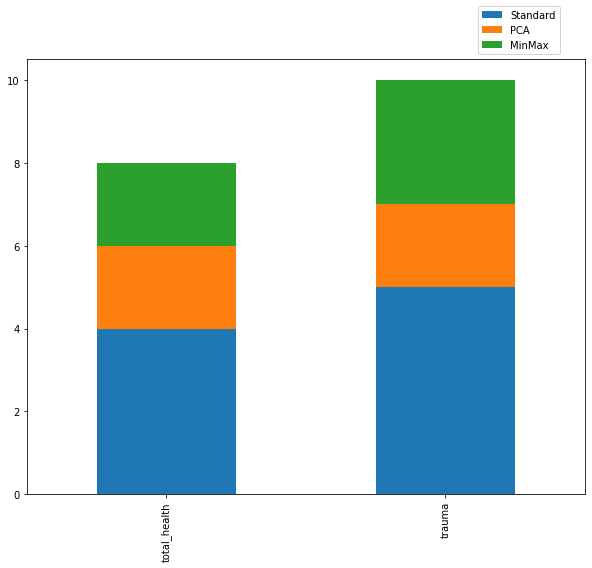

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

target=["total_health","trauma"]
preprocess={
    "Standard":[4,5],
    "PCA":[2,2],
    "MinMax":[2,3],
}

df=pd.DataFrame(preprocess,index=target)


df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

#Model

##Classification

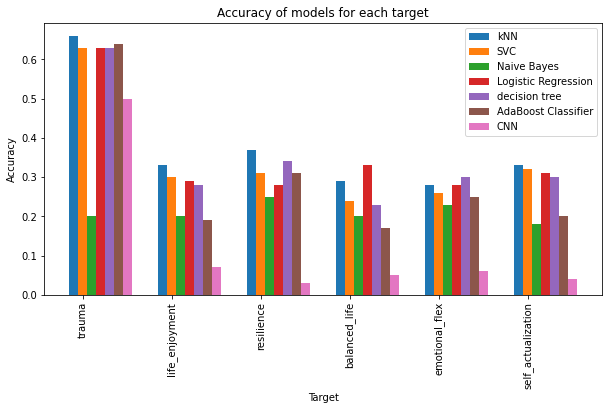

In [165]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 6
ind = np.arange(N) 
width = 0.1

kNN = [0.66, 0.33, 0.37, 0.29, 0.28, 0.33]
SVC = [0.63, 0.3, 0.31, 0.24, 0.26, 0.32]
Naive =[0.2, 0.2, 0.25, 0.2, 0.23, 0.18]
Logistic = [0.63, 0.29, 0.28, 0.33, 0.28, 0.31]
dec_tree = [0.63, 0.28, 0.34, 0.23, 0.3, 0.3]
adaboost = [0.64, 0.19, 0.31, 0.17, 0.25, 0.2]
CNN = [0.5, 0.07, 0.03, 0.05, 0.06, 0.04]
  
fig = plt.figure(figsize = (10, 5))

bar1 = plt.bar(ind, kNN, width)
bar2 = plt.bar(ind+width, SVC, width)
bar3 = plt.bar(ind+width*2, Naive, width)
bar4 = plt.bar(ind+width*3, Logistic, width)
bar5 = plt.bar(ind+width*4, dec_tree, width)
bar6 = plt.bar(ind+width*5, adaboost, width)
bar7 = plt.bar(ind+width*6, CNN, width)


plt.xlabel("Target")
plt.ylabel('Accuracy')
plt.title("Accuracy of models for each target")
  
plt.xticks(ind+width,['trauma','life_enjoyment','resilience', 'balanced_life', 'emotional_flex', 'self_actualization'], rotation = 90)
plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('kNN', 'SVC', 'Naive Bayes', 'Logistic Regression', 'decision tree', 'AdaBoost Classifier', 'CNN') )
plt.show()

##Regression

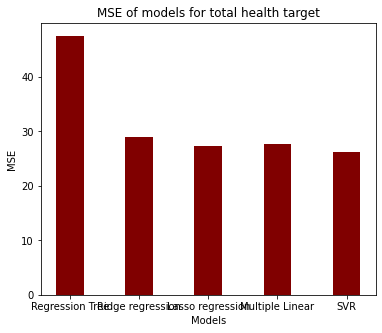

In [201]:
#total_health

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Regression Tree':47.497, 'Ridge regression':28.872433, 'Lasso regression':27.350788,'Multiple Linear':27.630290, 'SVR':26.165215}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE of models for total health target")
plt.show()

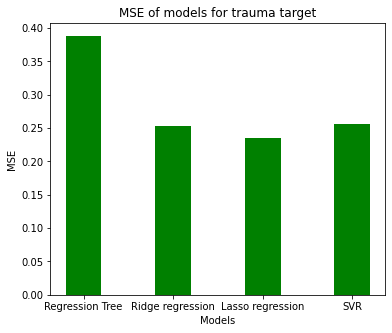

In [202]:
#trauma

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Regression Tree':0.388220, 'Ridge regression':0.252620, 'Lasso regression':0.235, 'SVR':0.256}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE of models for trauma target")
plt.show()

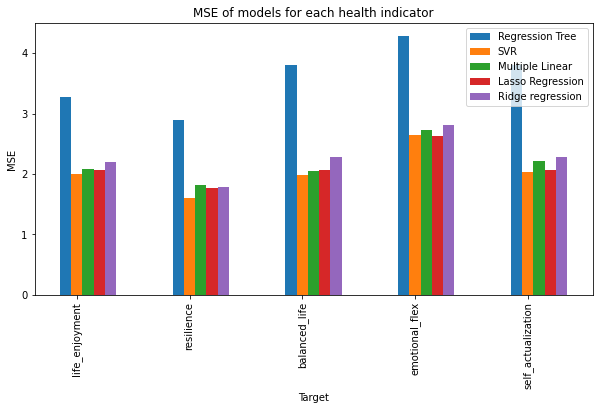

In [203]:
#health indicators

import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.1

reg_tree = [3.282296, 2.895917, 3.802878, 4.287316, 3.802878]
SVR = [1.996, 1.599892, 1.978397, 2.647031, 2.038816]
multi_lin =[2.082650, 1.811993, 2.044235, 2.721791, 2.212755]
Lasso = [2.07202, 1.765732, 2.065777, 2.622074, 2.065777]
Ridge = [2.195003, 1.787685, 2.284386, 2.809407, 2.284386]
  
fig = plt.figure(figsize = (10, 5))

bar1 = plt.bar(ind, reg_tree, width)
bar2 = plt.bar(ind+width, SVR, width)
bar3 = plt.bar(ind+width*2, multi_lin, width)
bar4 = plt.bar(ind+width*3, Lasso, width)
bar5 = plt.bar(ind+width*4, Ridge, width)


plt.xlabel("Target")
plt.ylabel('MSE')
plt.title("MSE of models for each health indicator")
  
plt.xticks(ind+width,['life_enjoyment','resilience', 'balanced_life', 'emotional_flex', 'self_actualization'], rotation = 90)
plt.legend( (bar1, bar2, bar3, bar4, bar5), ('Regression Tree', 'SVR', 'Multiple Linear', 'Lasso Regression', 'Ridge regression') )
plt.show()